In [91]:
#%matplotlib widget
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import warnings
import matplotlib as mpl
plt.rcParams['figure.figsize'] = [7.5, 7.5]
from scipy.stats import skew
mpl.style.use('ggplot')
from matplotlib.pyplot import cm

## 1. Example of a frequency file looks for English (merge 0):

In [92]:
freqs=pd.read_csv('eng-x-bible-kingjames.txt.clean.txt.0.txt.freqs.tsv', sep="\t", names=["subword", "freq"])

freqs['rank'] = freqs['freq'].rank(ascending=False)
freqs['log_freq'] = np.log10(freqs['freq'])
freqs['log_rank'] = np.log10(freqs['rank'])

In [93]:
freqs

subword  freq  rank  log_freq  log_rank
0      a@@  9081   1.0  3.958134  0.000000
1      e@@  8471   2.0  3.927935  0.301030
2      h@@  8444   3.0  3.926548  0.477121
3      t@@  7772   4.0  3.890533  0.602060
4      i@@  6259   5.0  3.796505  0.698970
5      n@@  5952   6.0  3.774663  0.778151
6      o@@  5795   7.0  3.763053  0.845098
7        e  5318   8.0  3.725748  0.903090
8        d  4392   9.0  3.642662  0.954243
9      s@@  4235  10.0  3.626853  1.000000
10     r@@  3565  11.0  3.552060  1.041393
11     l@@  2839  12.0  3.453165  1.079181
12       t  2672  13.0  3.426836  1.113943
13     u@@  2586  14.0  3.412629  1.146128
14       s  2316  15.0  3.364739  1.176091
15     w@@  2263  16.0  3.354685  1.204120
16       n  1876  17.0  3.273233  1.230449
17     c@@  1822  18.0  3.260548  1.255273
18     m@@  1819  19.0  3.259833  1.278754
19       y  1462  20.0  3.164947  1.301030
20       o  1461  21.0  3.164650  1.322219
21     b@@  1450  22.0  3.161368  1.342423
22     g@@  1362  23.0  3.134177  1.361728
23     p@@  1296  24.0  3.112605  1.380211
24     d@@  1283  25.0  3.108227  1.397940
25       m  1256  26.0  3.098990  1.414973
26     f@@  1236  27.0  3.092018  1.431364
27       r  1197  28.0  3.078094  1.447158
28       h   967  29.0  2.985426  1.462398
29     v@@   899  30.0  2.953760  1.477121
30       f   854  31.0  2.931458  1.491362
31     y@@   770  32.0  2.886491  1.505150
32       l   731  33.0  2.863917  1.518514
33       g   525  34.0  2.720159  1.531479
34     k@@   514  35.0  2.710963  1.544068
35       :   369  36.0  2.567026  1.556303
36       a   347  37.0  2.540329  1.568202
37     j@@   306  38.0  2.485721  1.579784
38       w   268  39.0  2.428135  1.591065
39       u   267  40.0  2.426511  1.602060
40       ;   262  41.0  2.418301  1.612784
41       i   204  42.0  2.309630  1.623249
42       k   173  43.0  2.238046  1.633468
43       p   131  44.0  2.117271  1.643453
44     z@@    44  45.0  1.643453  1.653213
45     x@@    41  46.0  1.612784  1.662758
46     '@@    40  47.0  1.602060  1.672098
47     q@@    20  48.0  1.301030  1.681241
48       b    16  49.0  1.204120  1.690196
49       x     7  50.0  0.845098  1.698970
50       '     4  51.0  0.602060  1.707570
51       c     2  52.0  0.301030  1.716003

## 2. PLOTS (rank vs freq)
For each language:
1. Plot of rank vs frequency
2. log-log plot: log(rank) vs log(frquency) 

Strictly speaking, if there is a power law, we should see a straight line in the log-log plot.

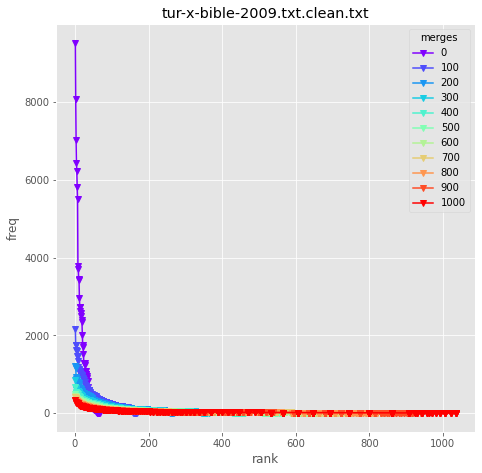

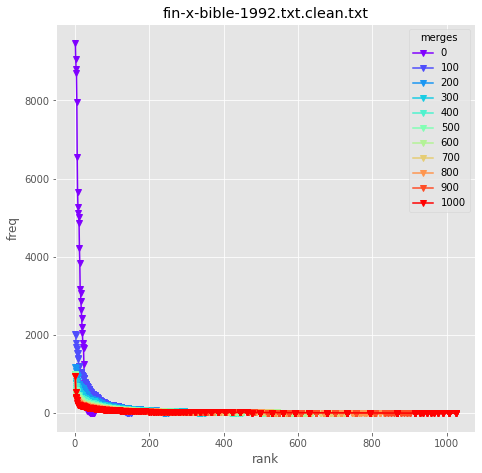

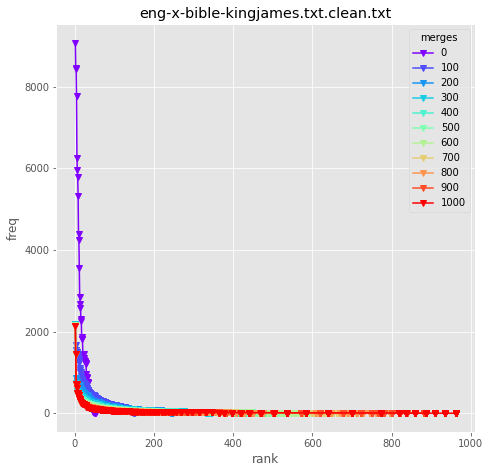

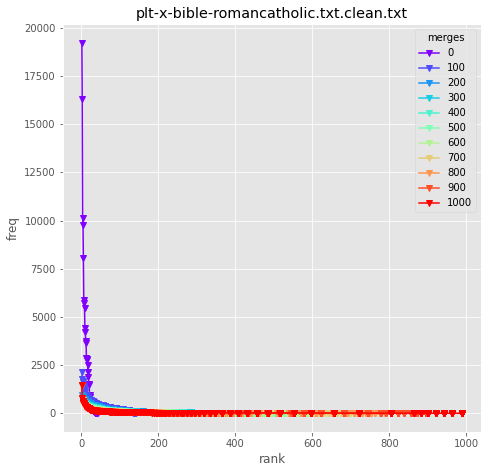

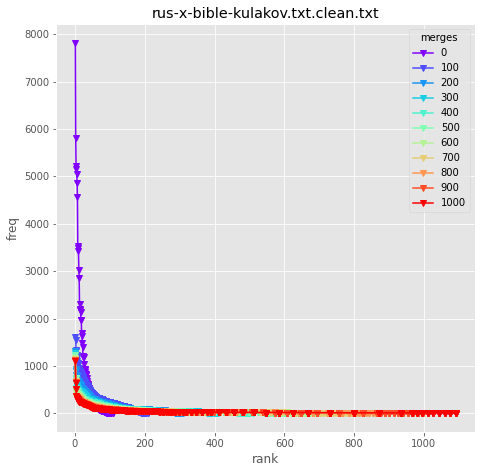

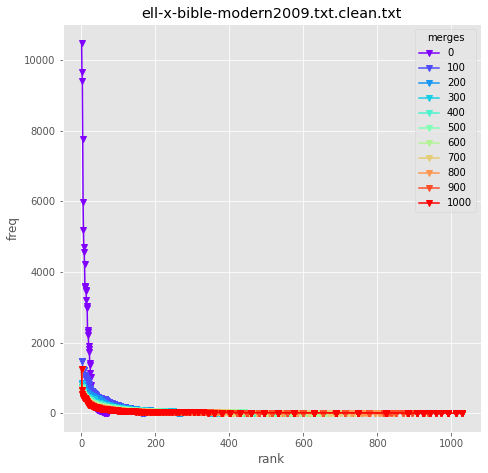

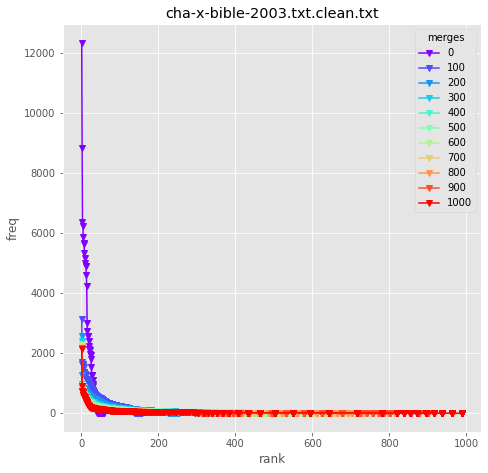

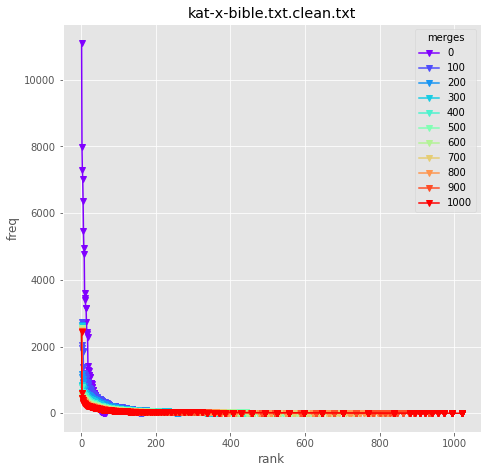

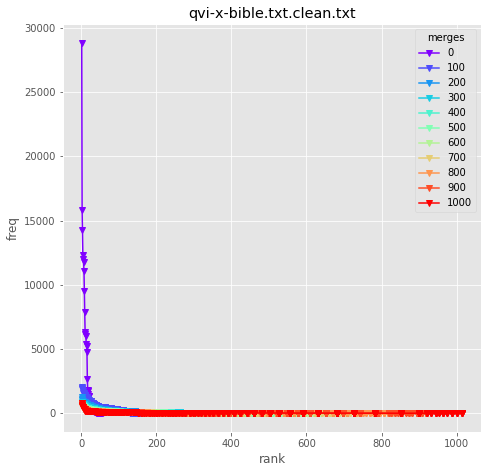

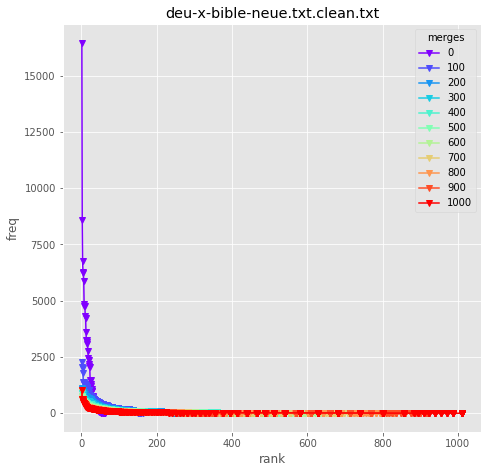

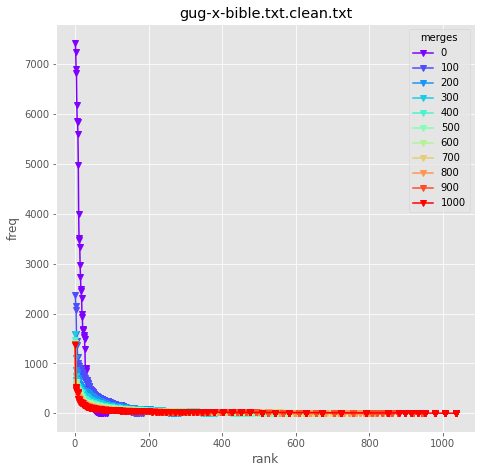

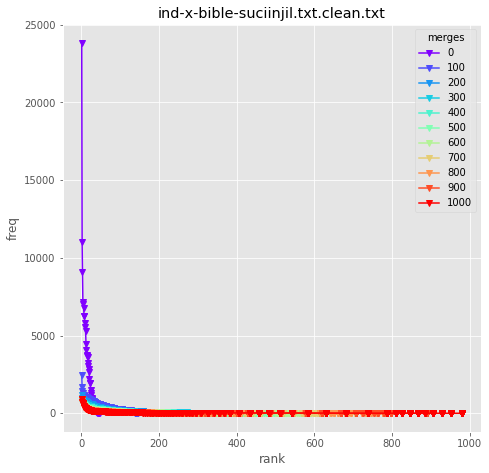

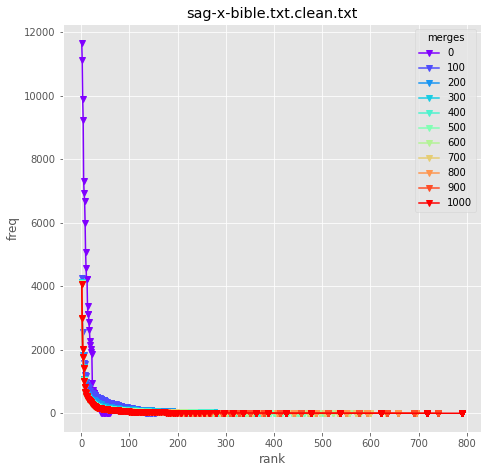

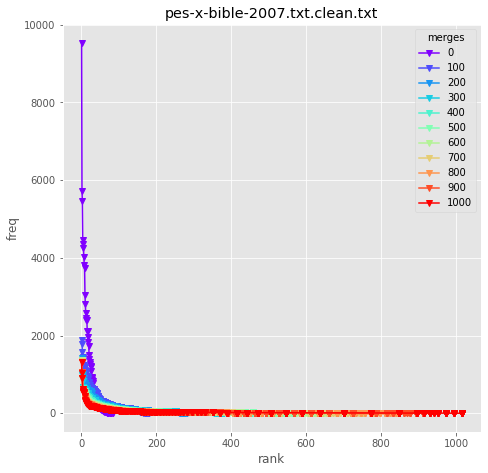

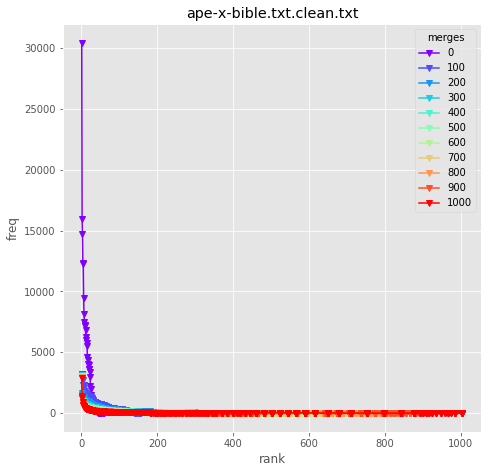

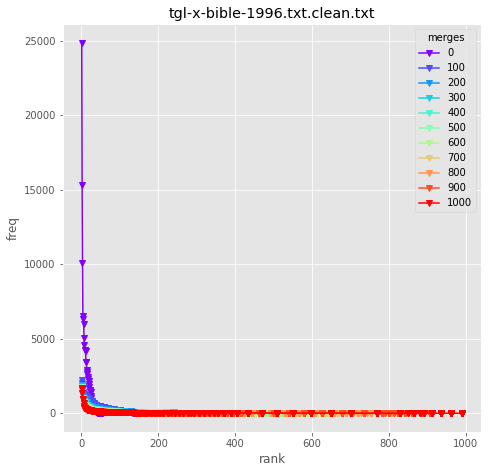

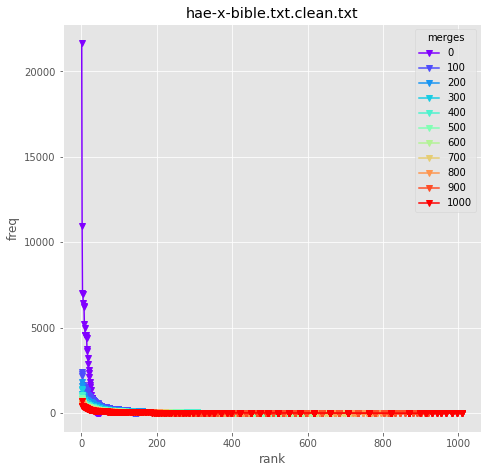

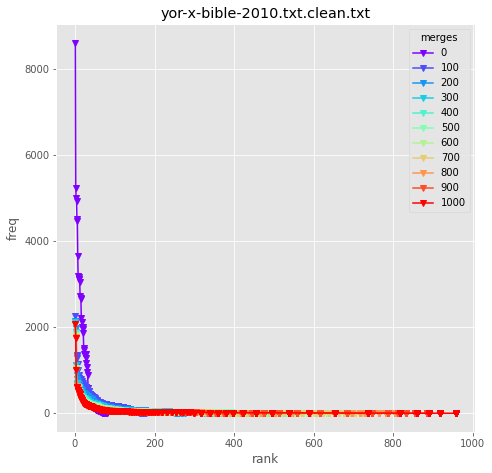

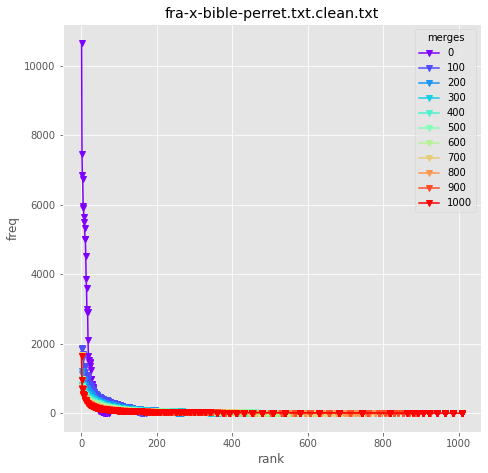

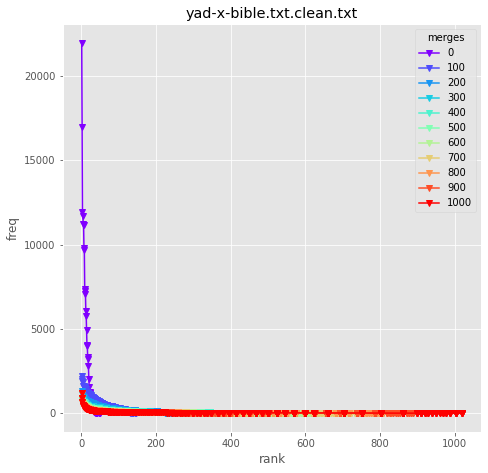

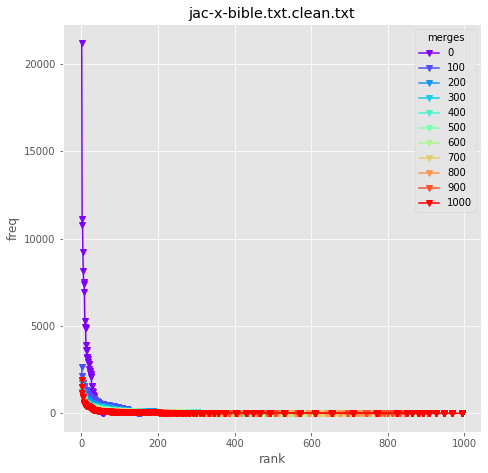

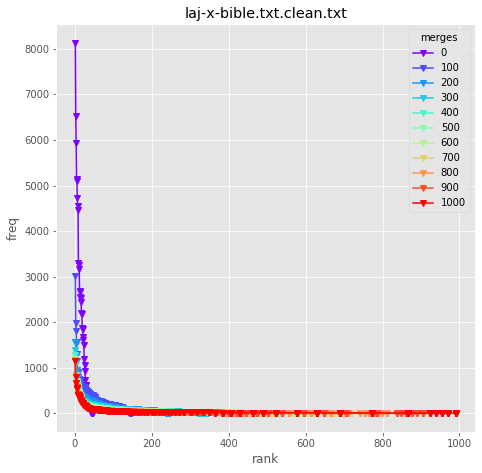

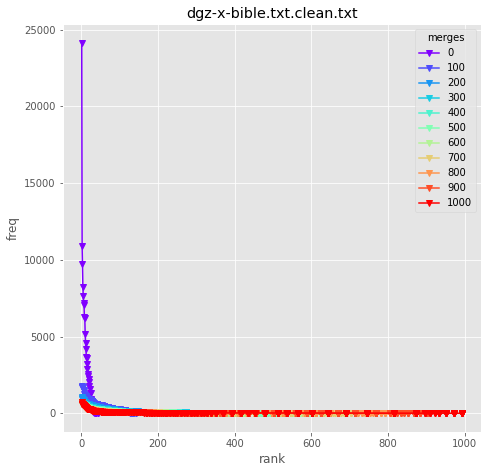

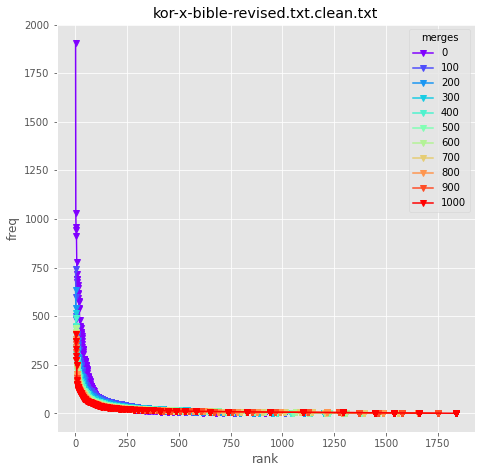

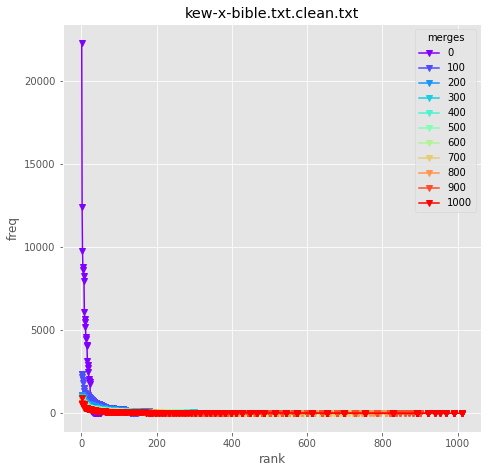

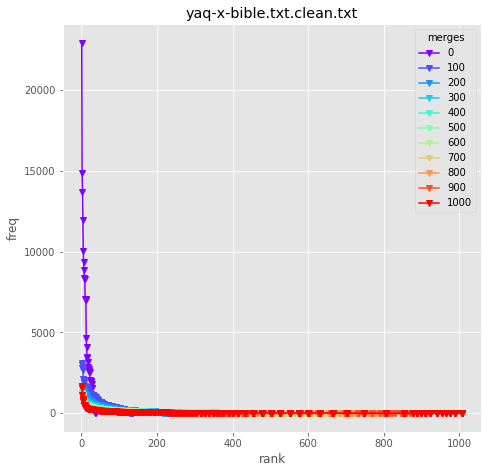

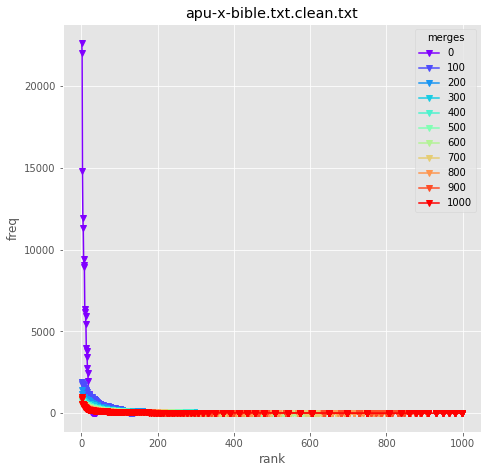

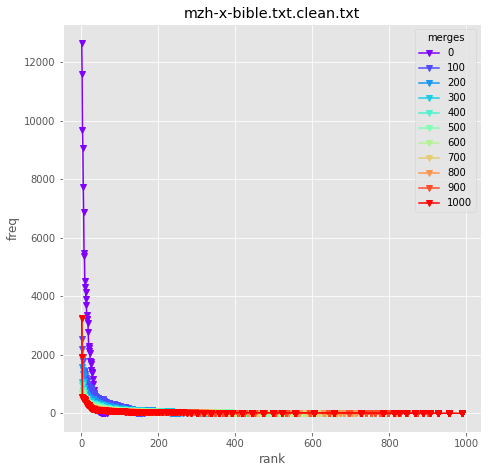

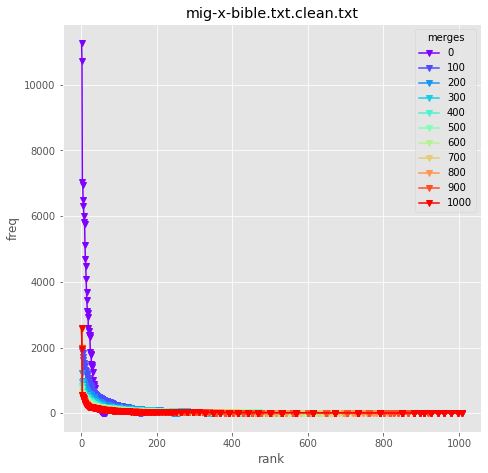

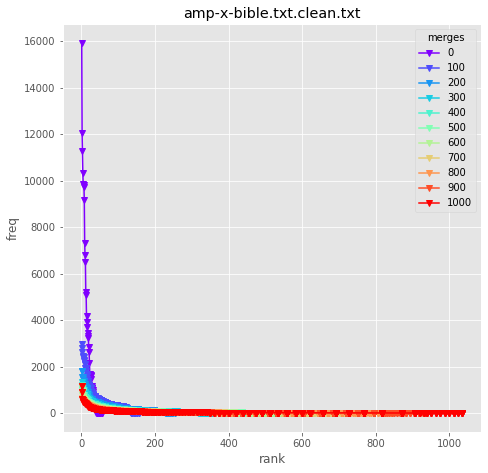

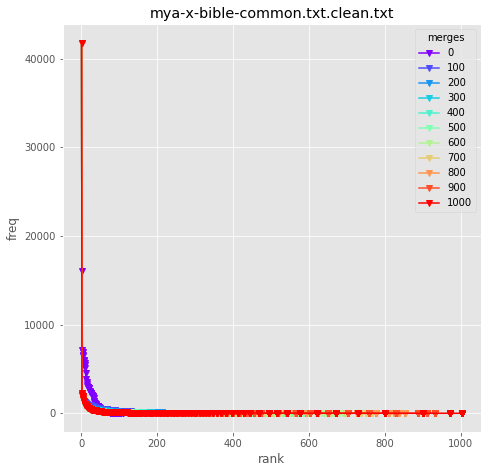

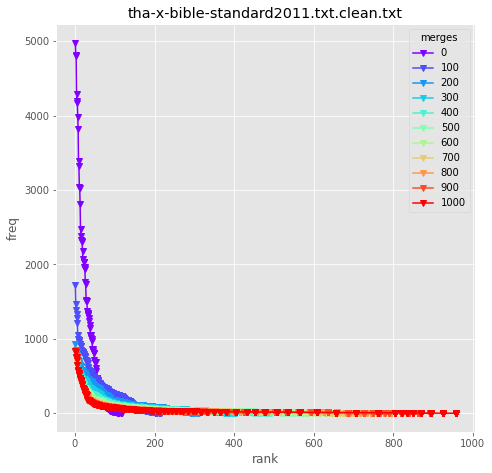

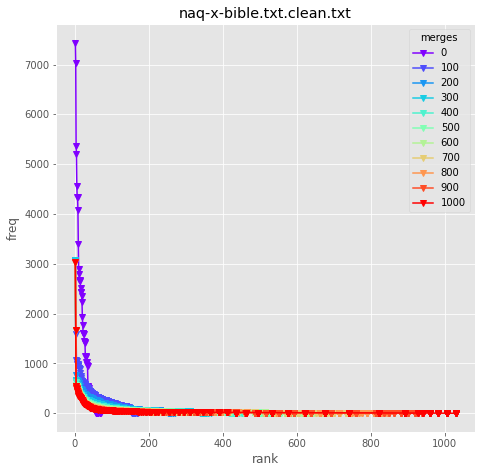

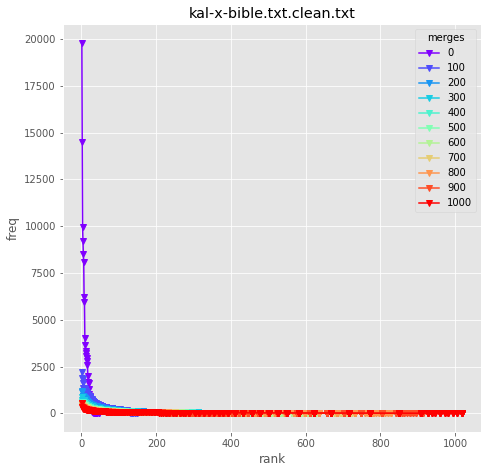

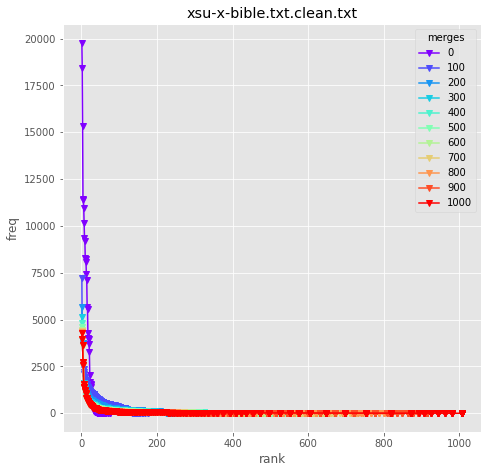

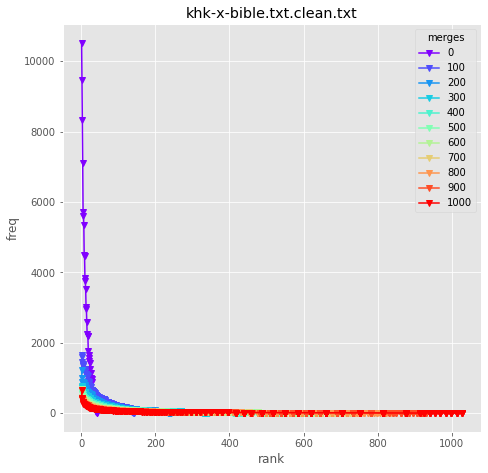

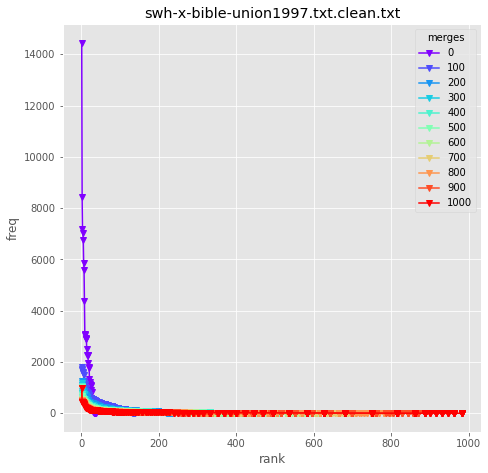

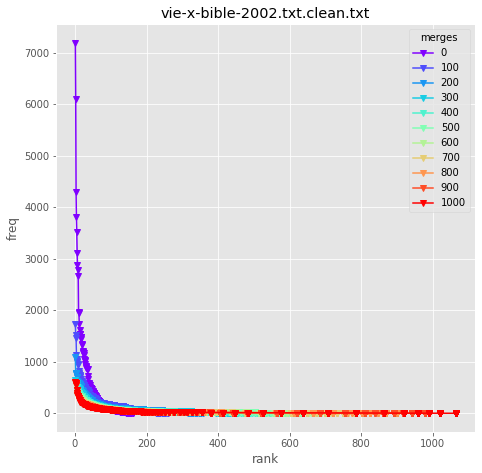

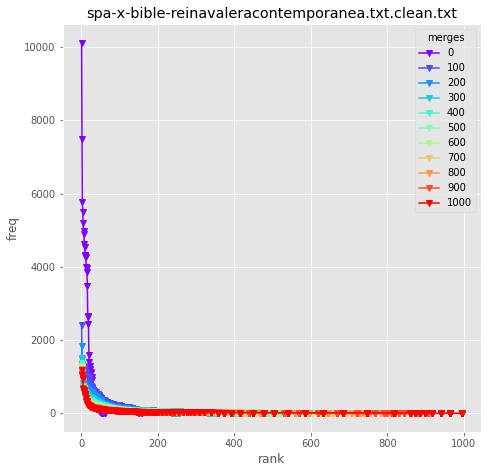

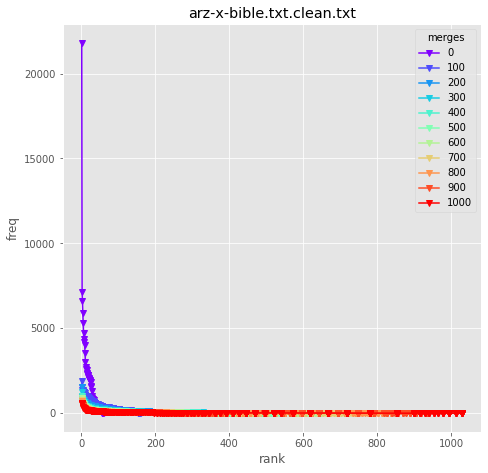

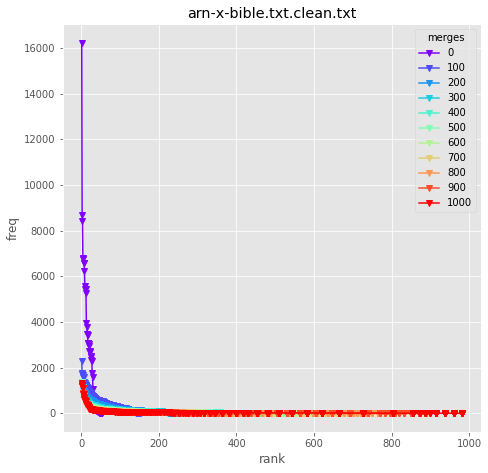

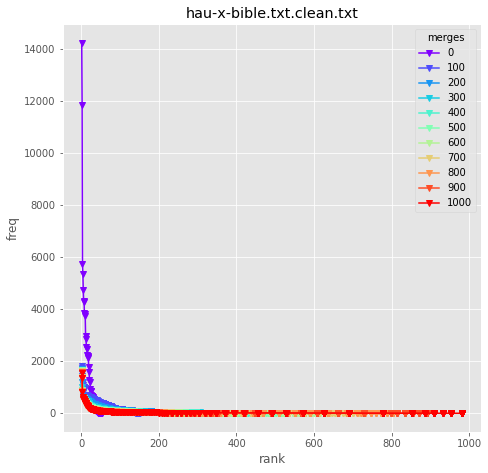

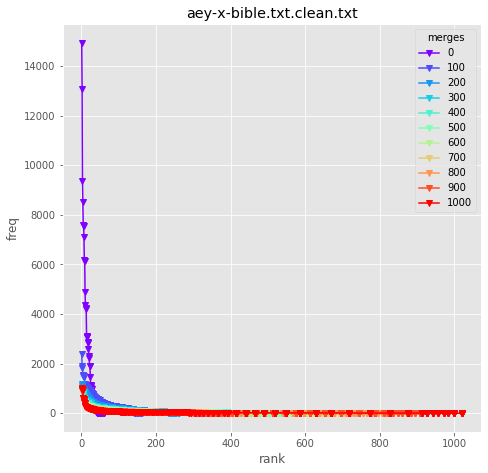

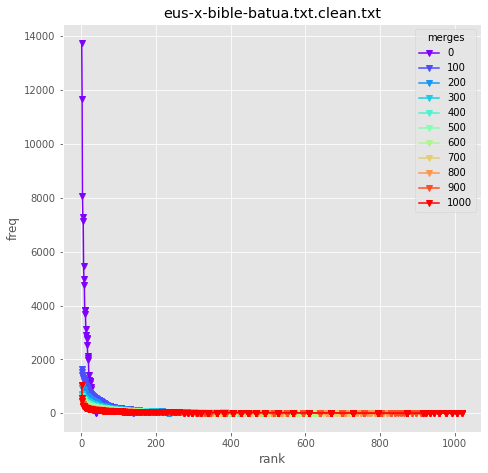

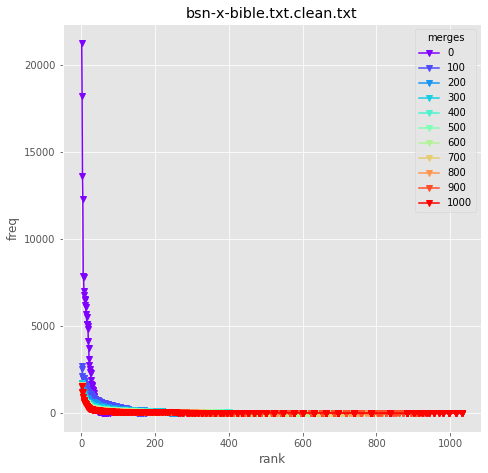

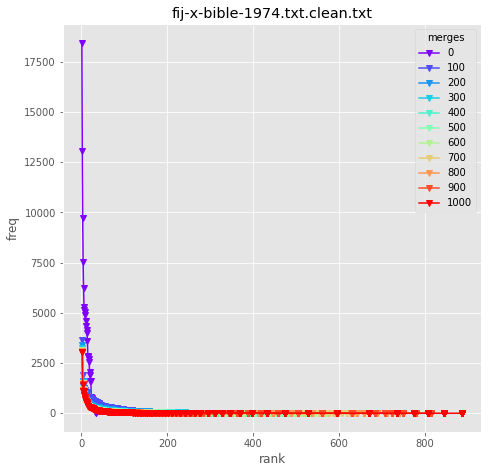

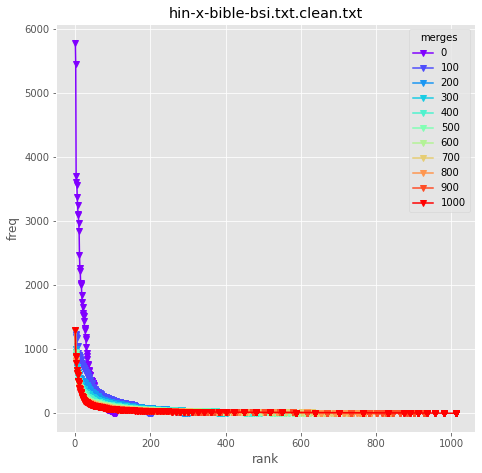

In [94]:
directory="segmented_corpusPBC_tok_0_1000_1"
all_files = os.listdir(directory) #languages
k=0
for f in all_files:
    plt.figure() #a new figure 
    color = iter(cm.rainbow(np.linspace(0, 1, 11)))
    for k in range(0, 1100, 100) :
    #eng-x-bible-kingjames.txt.clean.txt.0.txt.freqs.tsv
        #print(directory+"/"+f+"/"+f+"."+str(k)+".txt.freqs.tsv")
        filepath=directory+"/"+f+"/"+f+"."+str(k)+".txt.freqs.tsv"
        freqs=pd.read_csv(filepath, sep="\t", names=["subword", "freq"])
        
        freqs['rank'] = freqs['freq'].rank(ascending=False)
        freqs['log_freq'] = np.log10(freqs['freq'])
        freqs['log_rank'] = np.log10(freqs['rank'])
        #freqs.plot(x='log_rank', y='log_freq', marker='.')  
        
        plt.plot(freqs['rank'], freqs['freq'],'-v', c=next(color))
        plt.legend(range(0, 1100, 100), title="merges")
        plt.xlabel('rank')
        plt.ylabel('freq')
        plt.savefig("plots/"+f+'.png')
        warnings.filterwarnings("ignore")
        plt.title(f)
        
    #import sys
    #sys.exit()
        

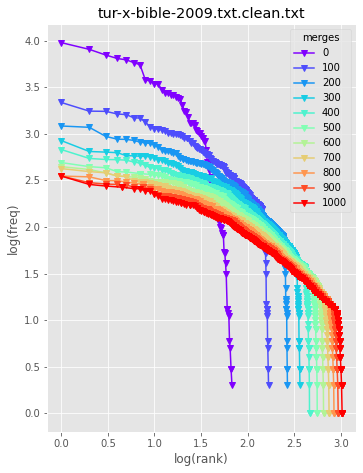

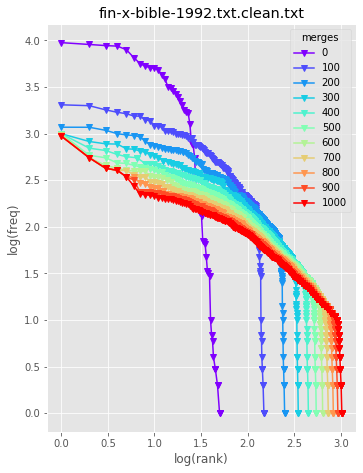

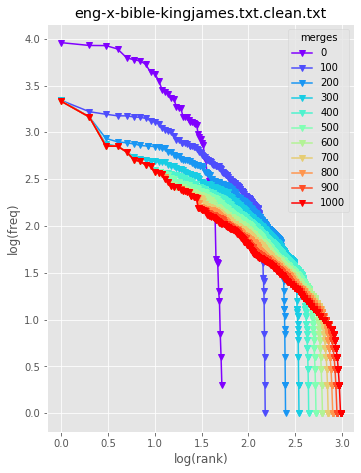

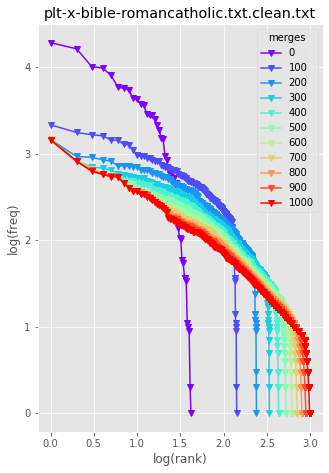

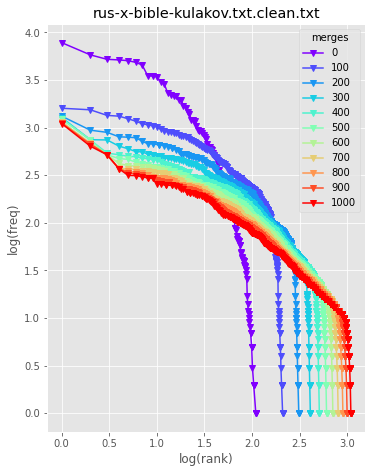

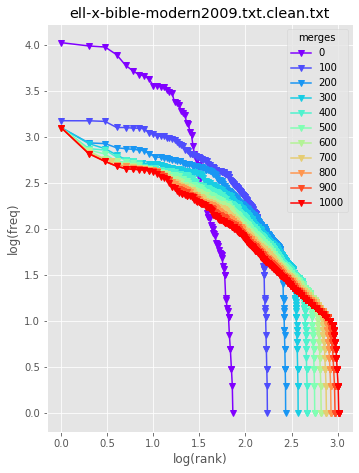

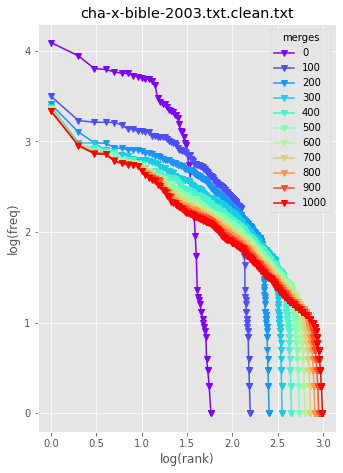

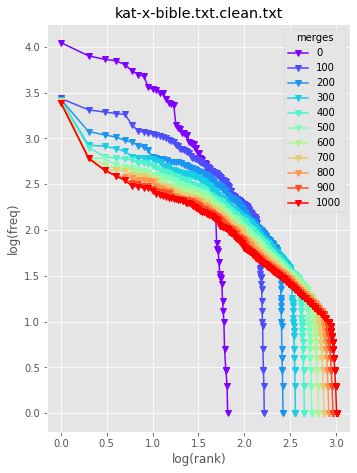

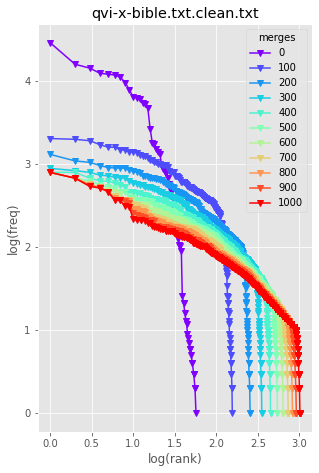

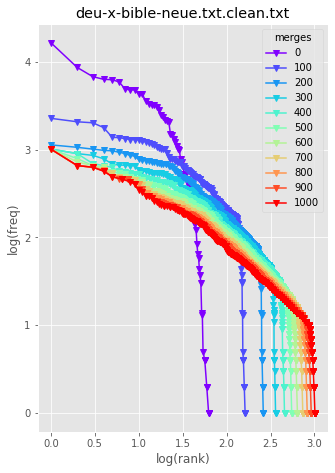

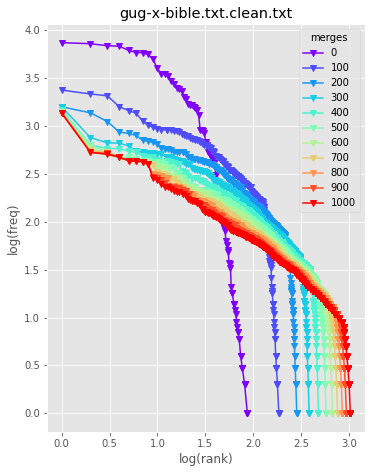

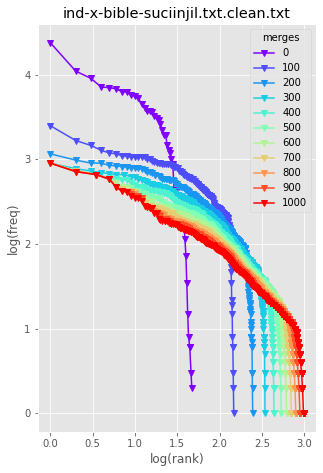

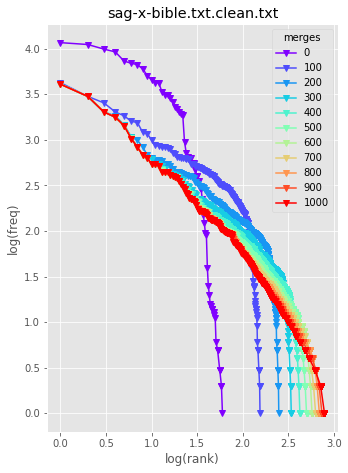

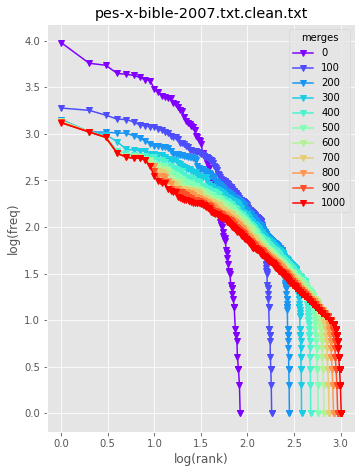

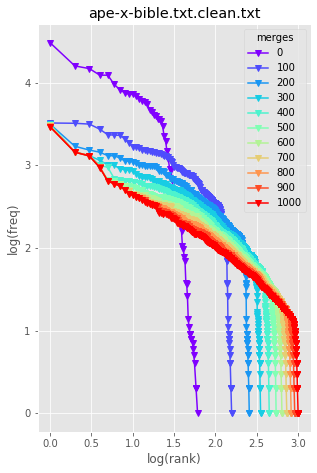

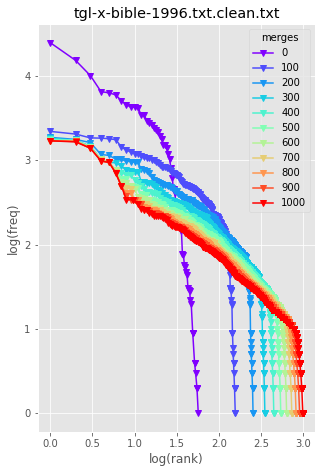

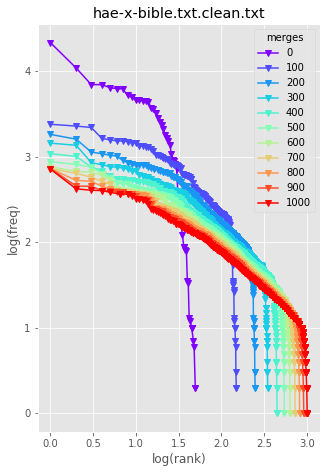

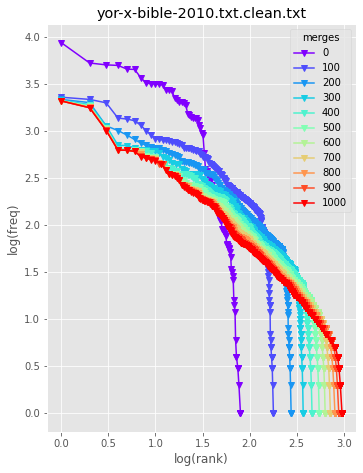

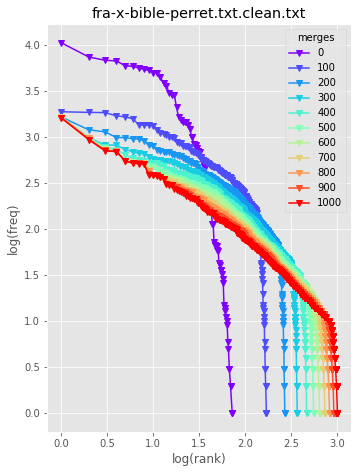

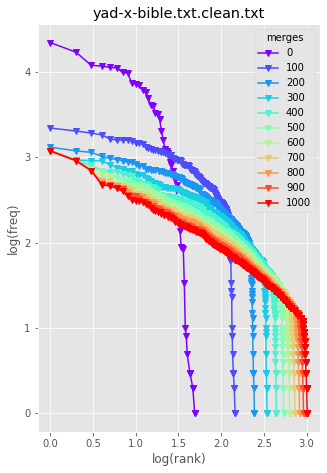

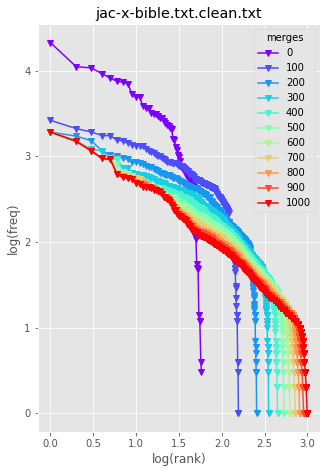

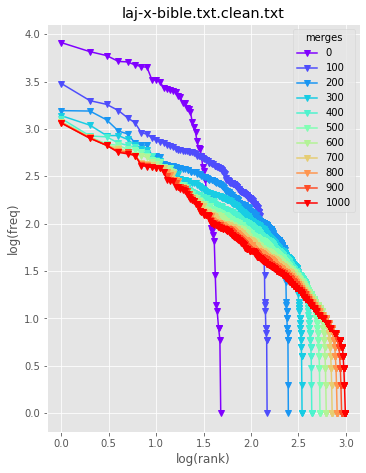

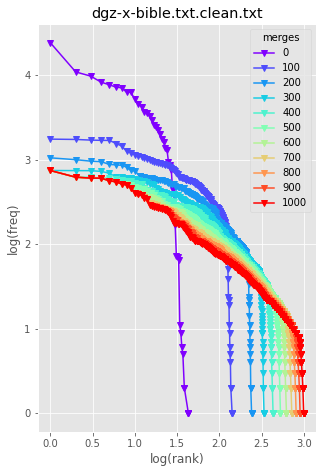

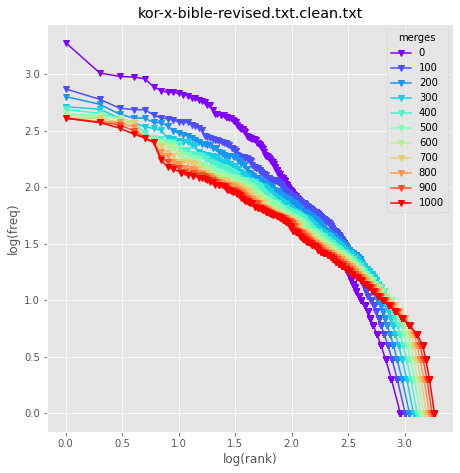

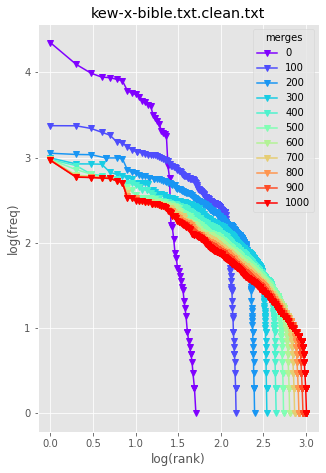

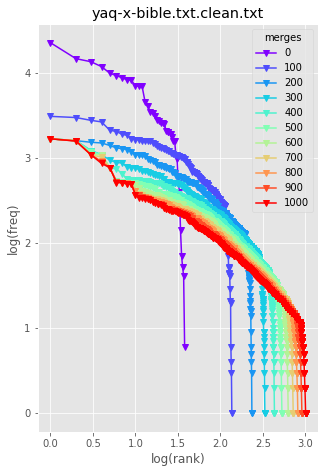

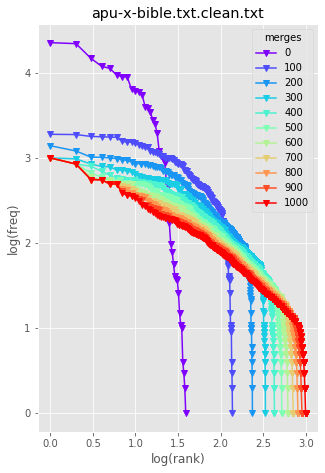

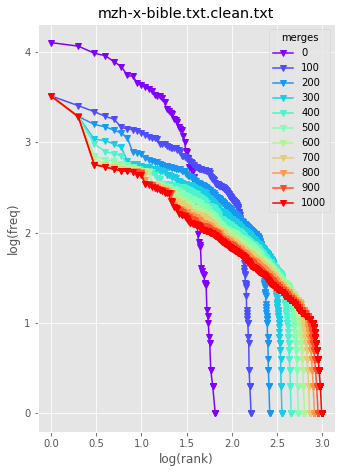

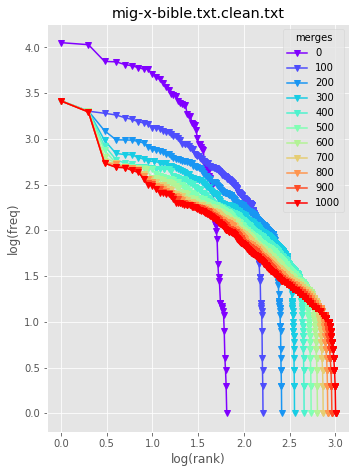

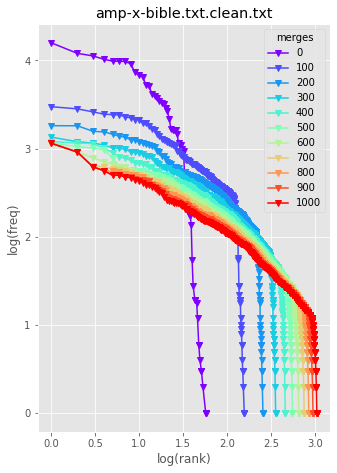

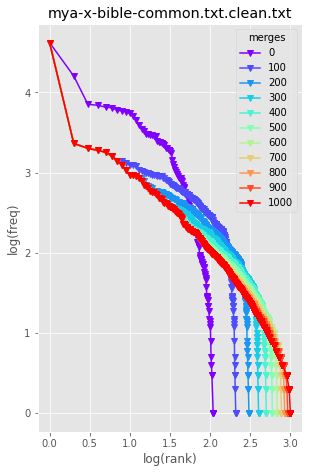

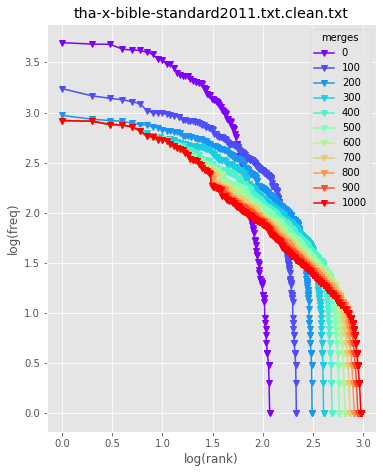

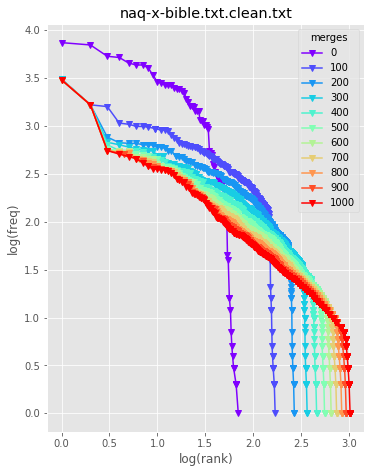

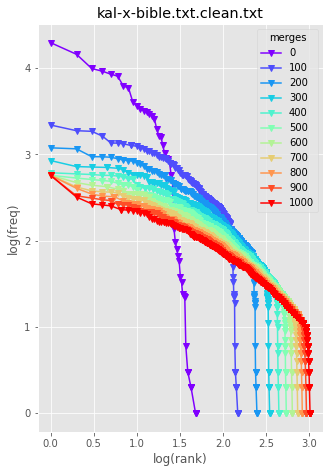

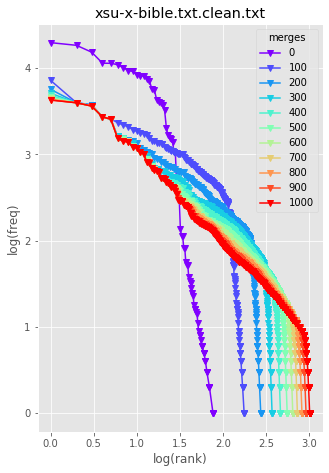

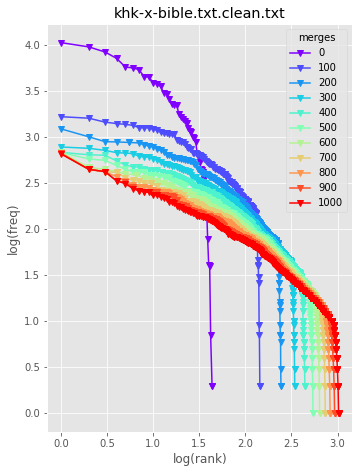

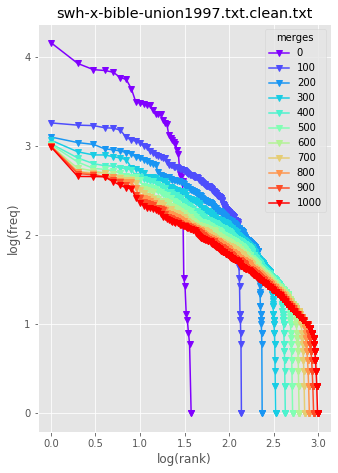

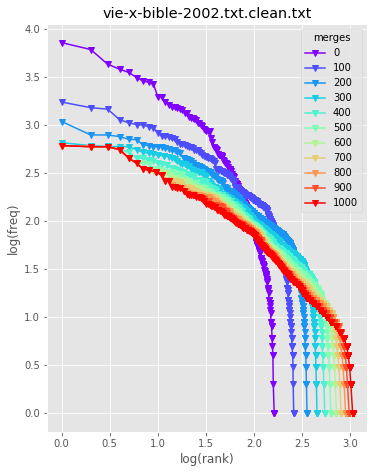

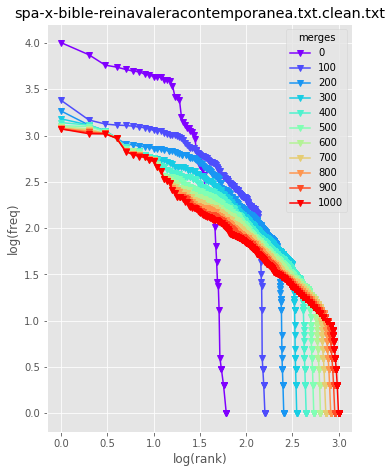

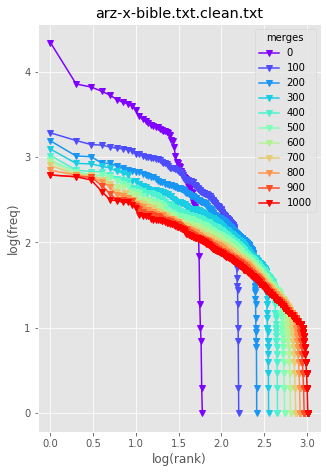

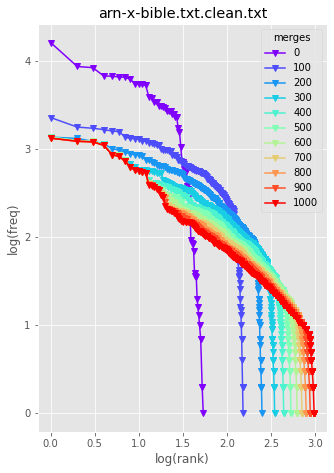

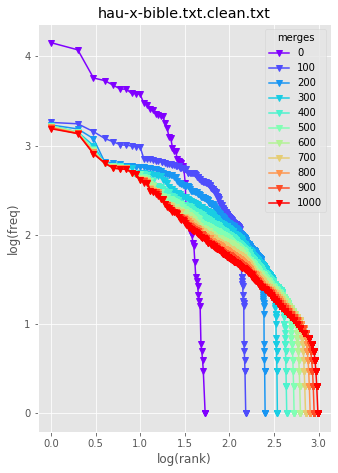

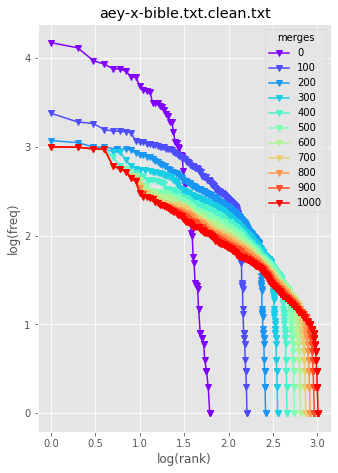

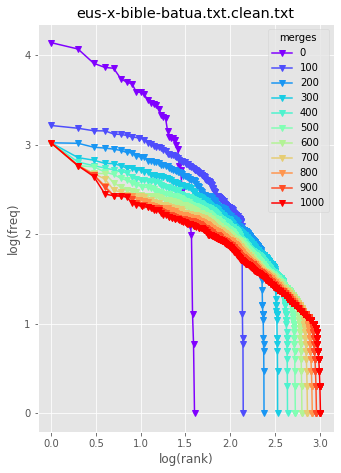

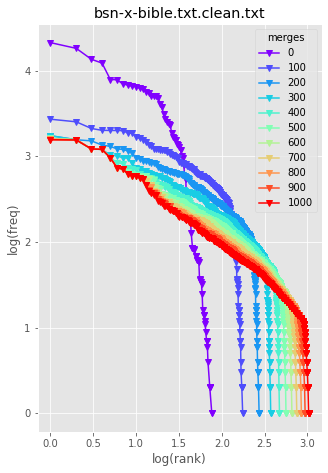

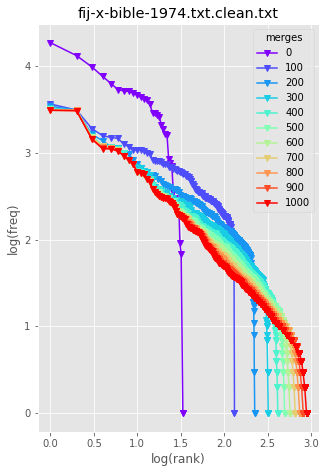

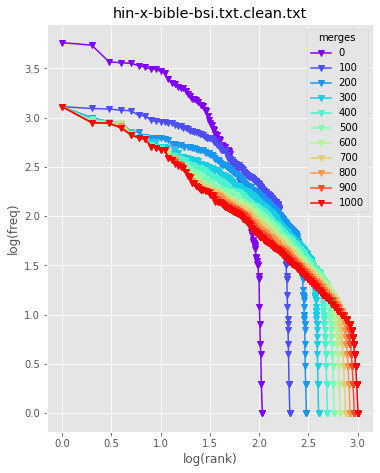

In [95]:
directory="segmented_corpusPBC_tok_0_1000_1"
all_files = os.listdir(directory) #languages
k=0
for f in all_files:
    plt.figure() #a new figure 
    color = iter(cm.rainbow(np.linspace(0, 1, 11)))
    for k in range(0, 1100, 100) :
    #eng-x-bible-kingjames.txt.clean.txt.0.txt.freqs.tsv
        #print(directory+"/"+f+"/"+f+"."+str(k)+".txt.freqs.tsv")
        filepath=directory+"/"+f+"/"+f+"."+str(k)+".txt.freqs.tsv"
        freqs=pd.read_csv(filepath, sep="\t", names=["subword", "freq"])
        
        freqs['rank'] = freqs['freq'].rank(ascending=False)
        freqs['log_freq'] = np.log10(freqs['freq'])
        freqs['log_rank'] = np.log10(freqs['rank'])
        #freqs.plot(x='log_rank', y='log_freq', marker='.')  
        #plt.savefig(f+"."+str(k)+'.png')
              
        plt.plot(freqs['log_rank'], freqs['log_freq'],'-v', c=next(color))
        plt.legend(range(0, 1100, 100), title="merges")
        plt.xlabel('log(rank)')
        plt.ylabel('log(freq)')
        plt.axes().set_aspect('equal')
        plt.savefig("plots/"+f+'.log.png')
        warnings.filterwarnings("ignore")
        plt.title(f)
        
    #import sys
    #sys.exit()

## 3. Skewdness
Using [scipy.stats.skew](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html) (Fisher-Pearson coefficient of skewness)

"For normally distributed data, the skewness should be about zero. For unimodal continuous distributions, a skewness value greater than zero means that there is more weight in the right tail of the distribution."


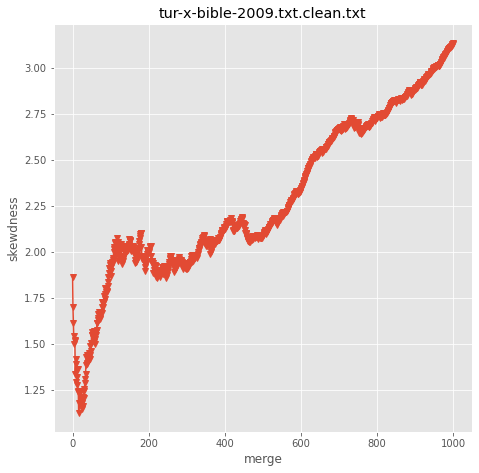

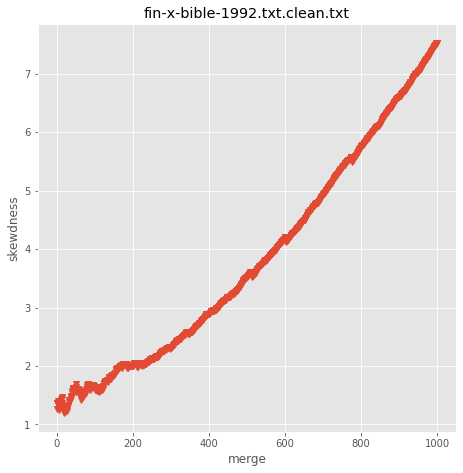

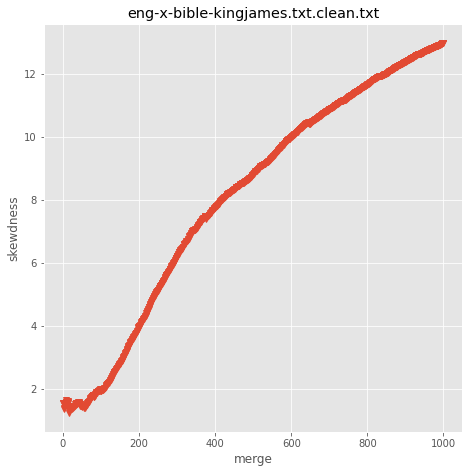

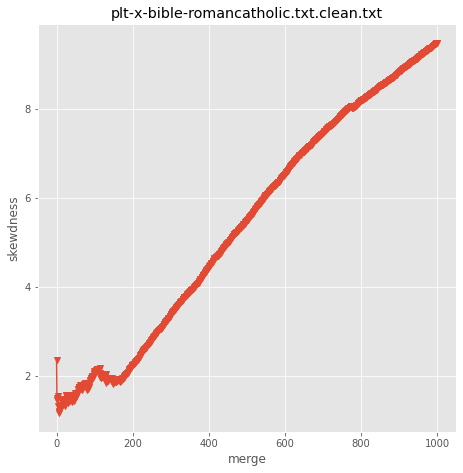

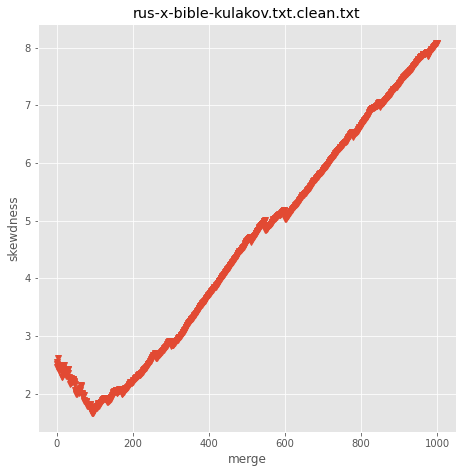

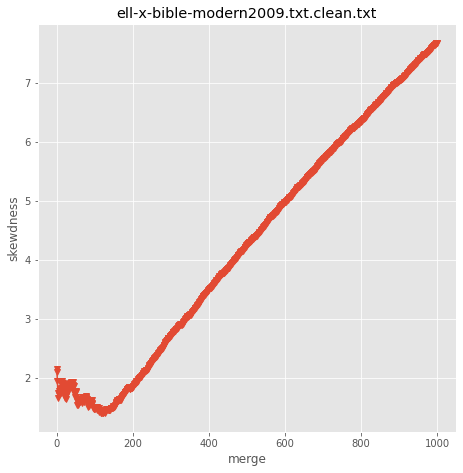

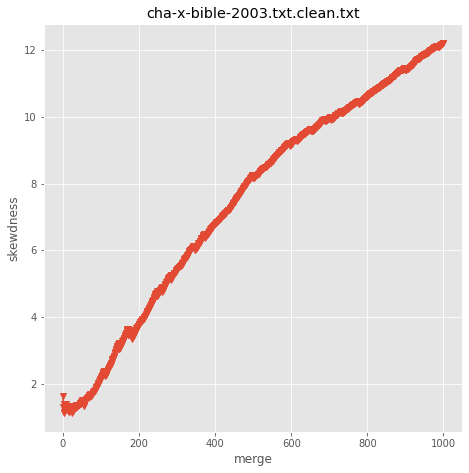

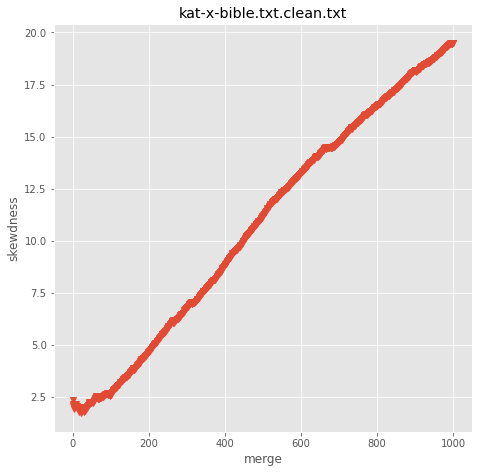

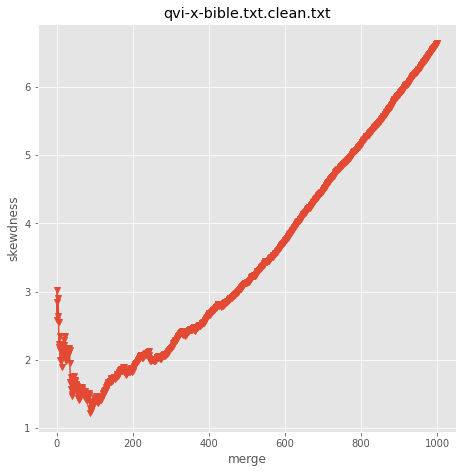

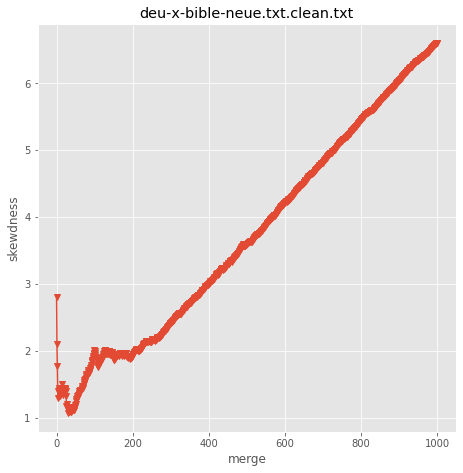

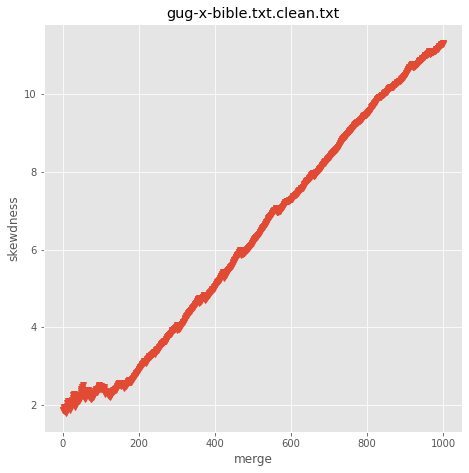

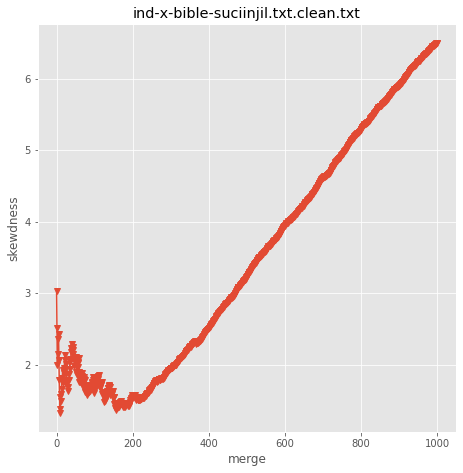

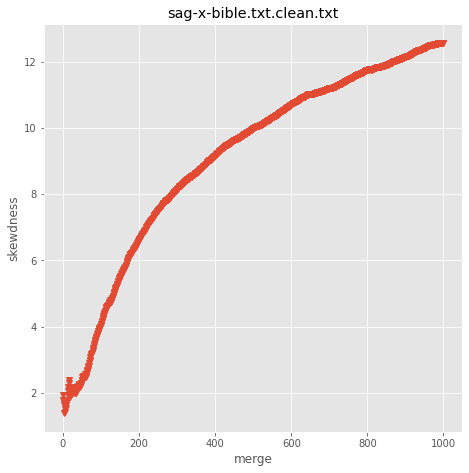

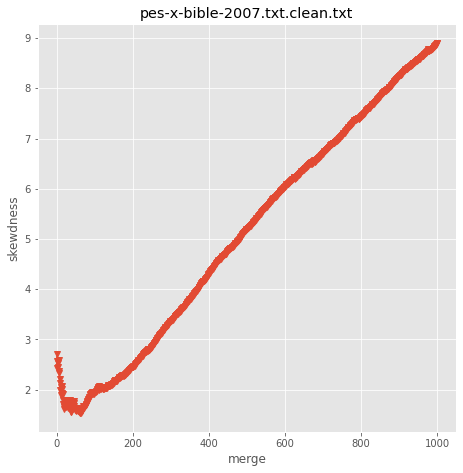

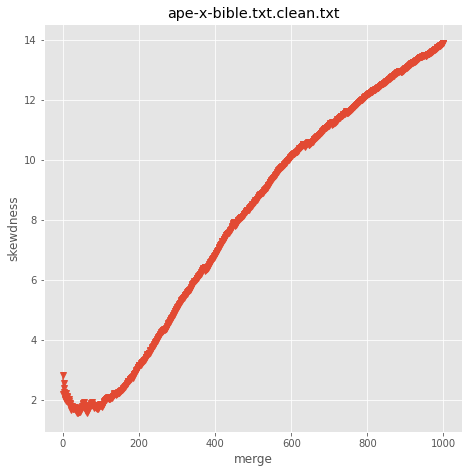

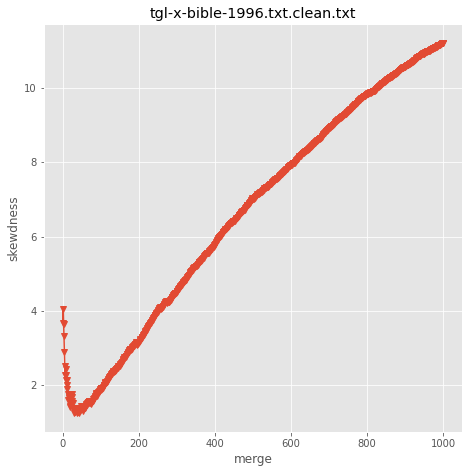

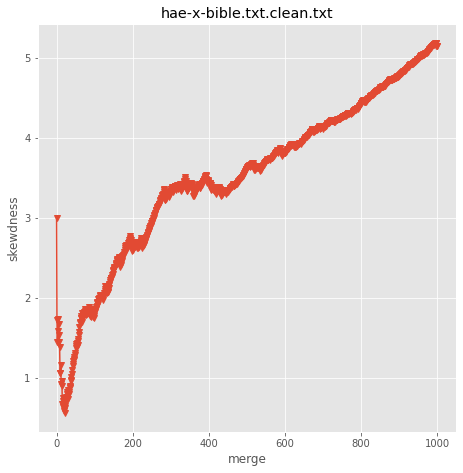

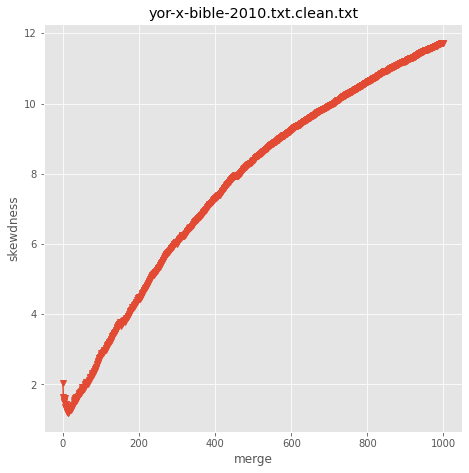

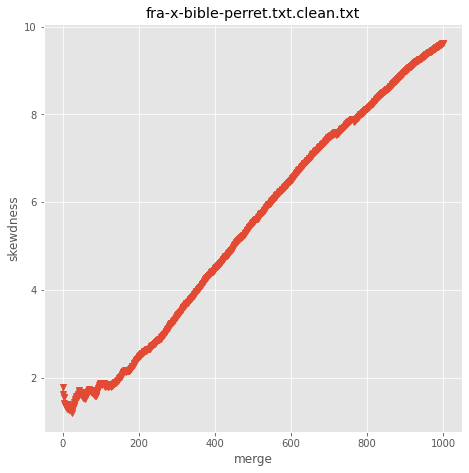

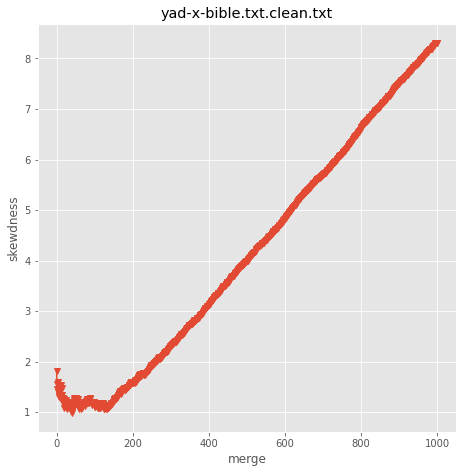

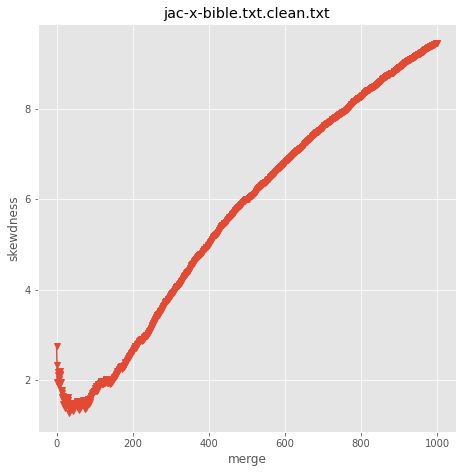

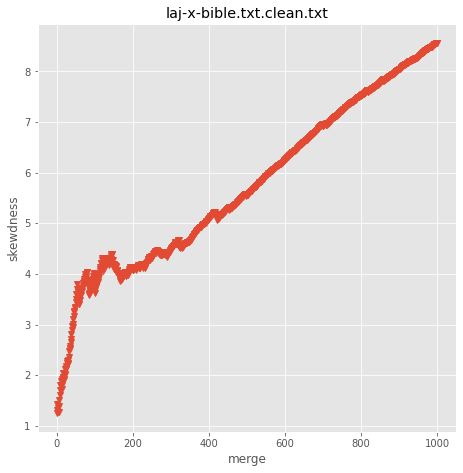

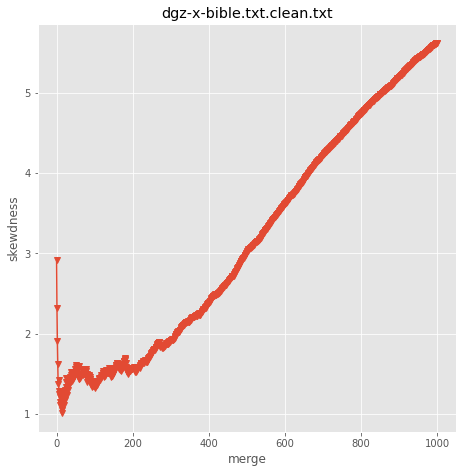

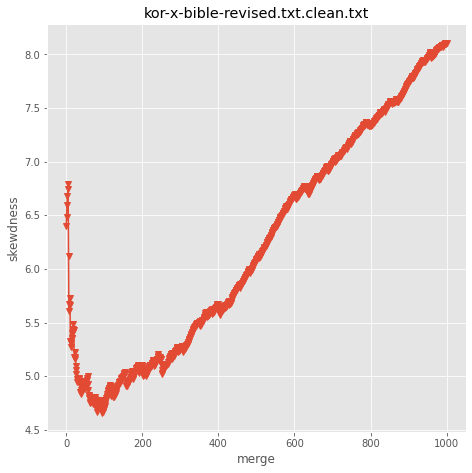

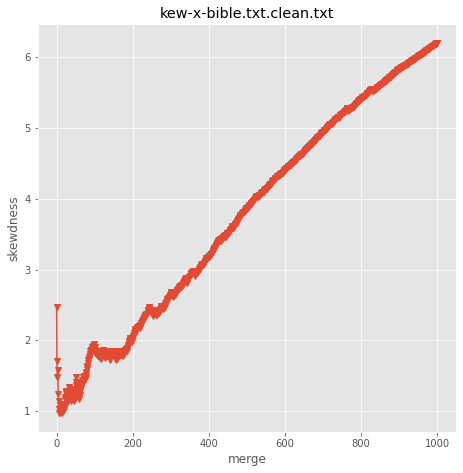

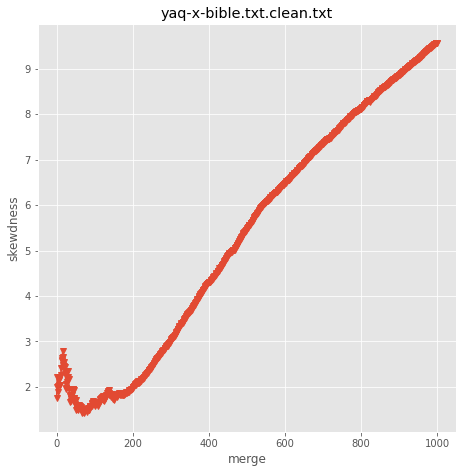

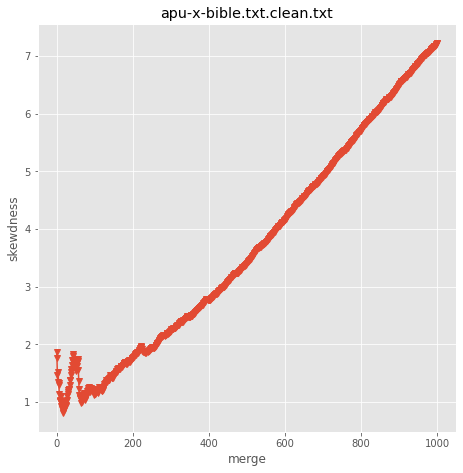

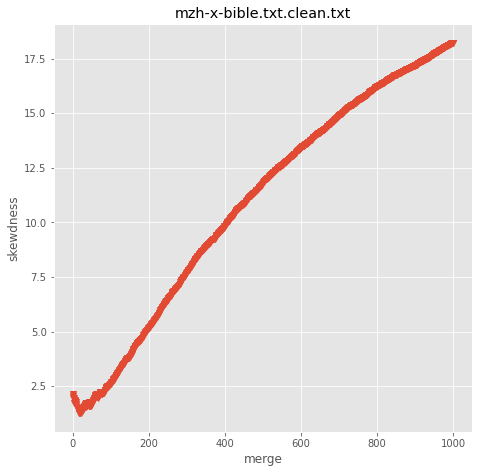

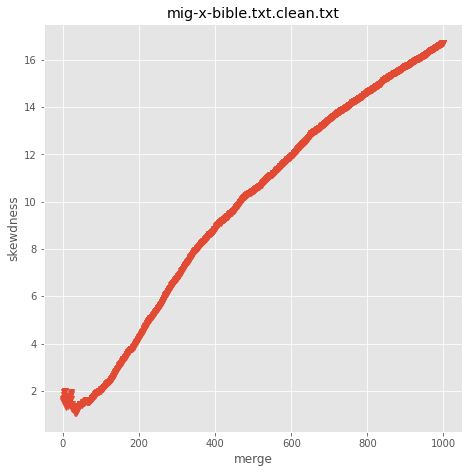

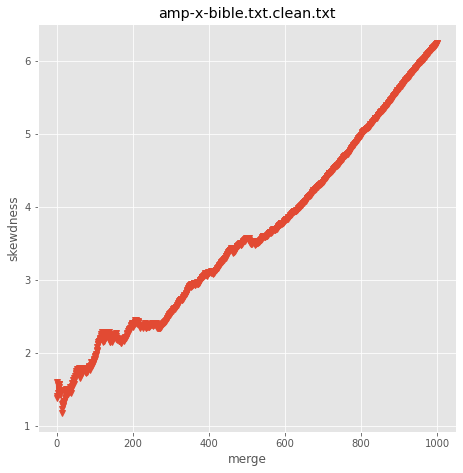

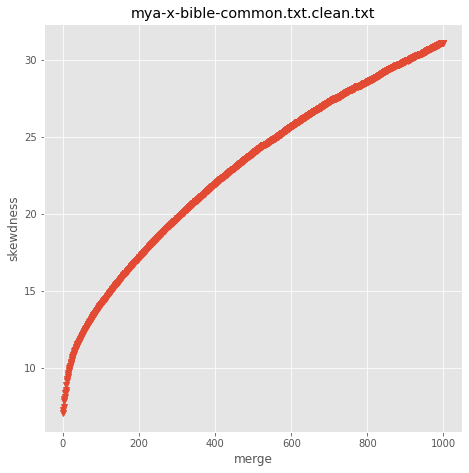

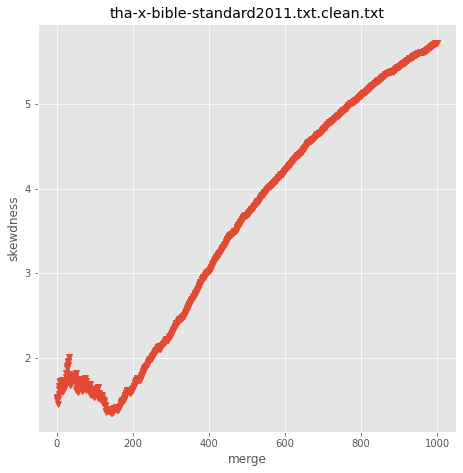

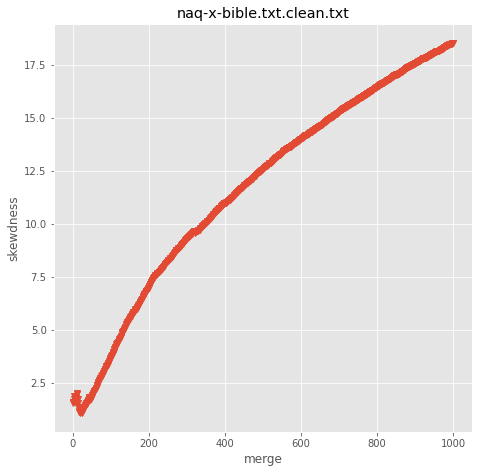

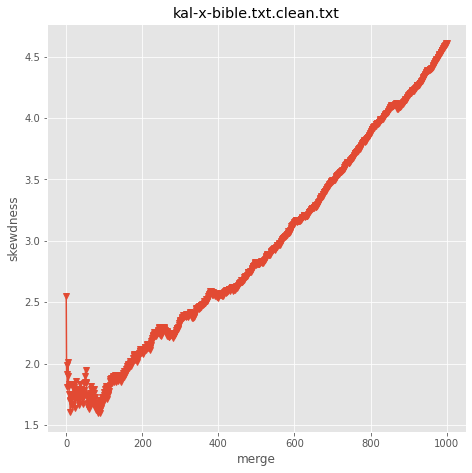

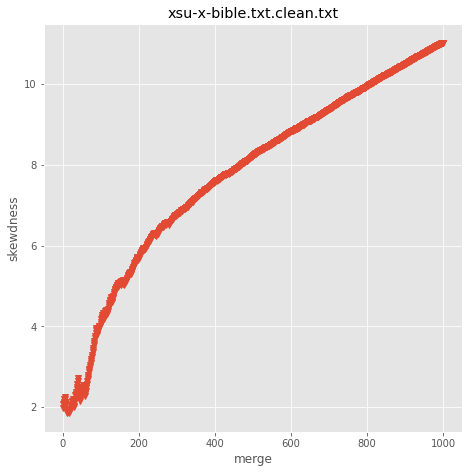

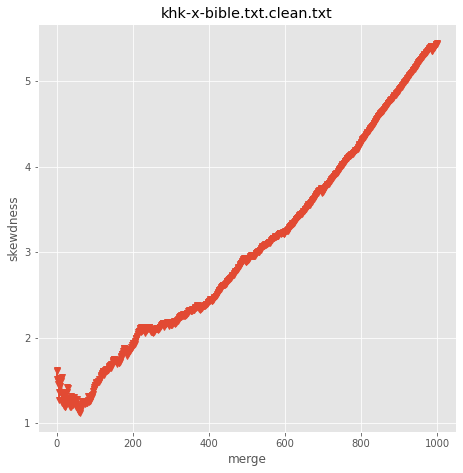

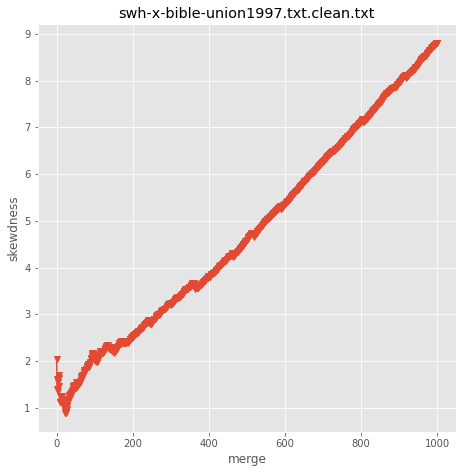

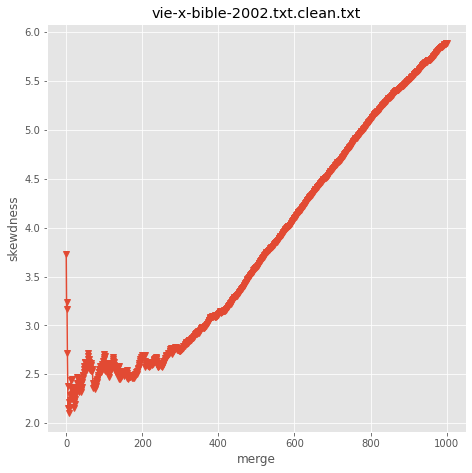

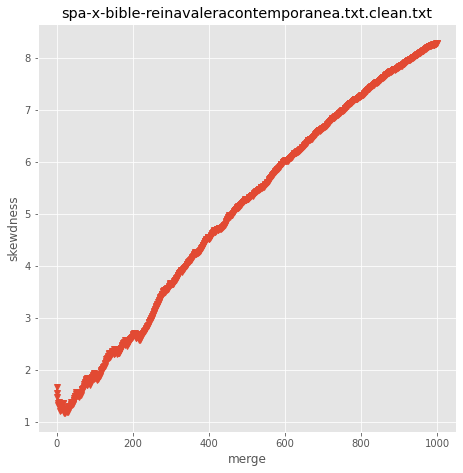

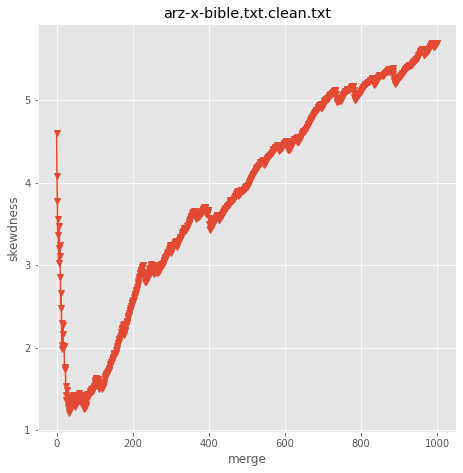

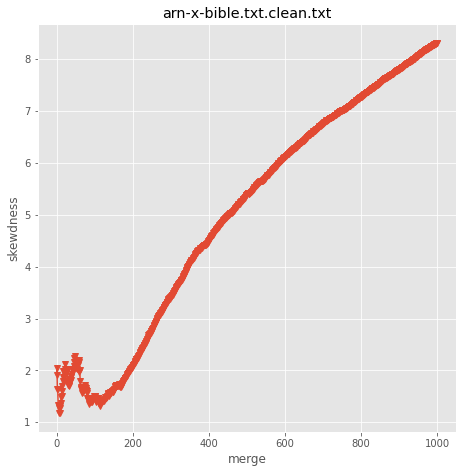

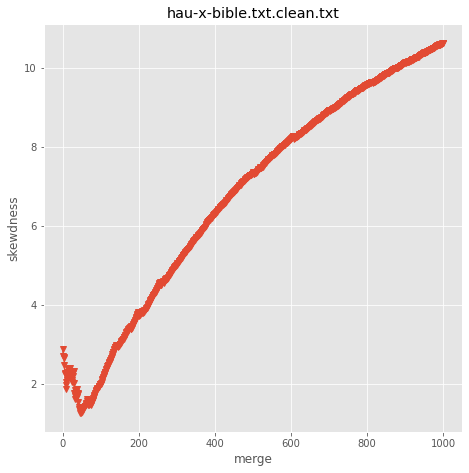

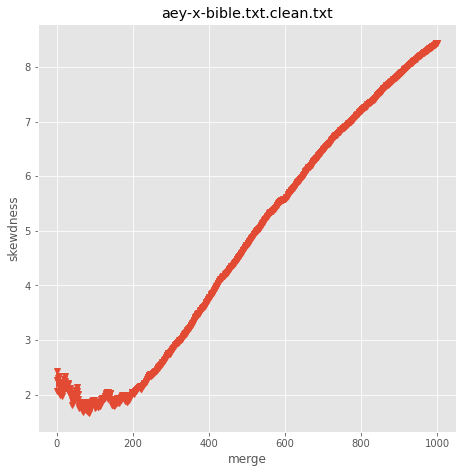

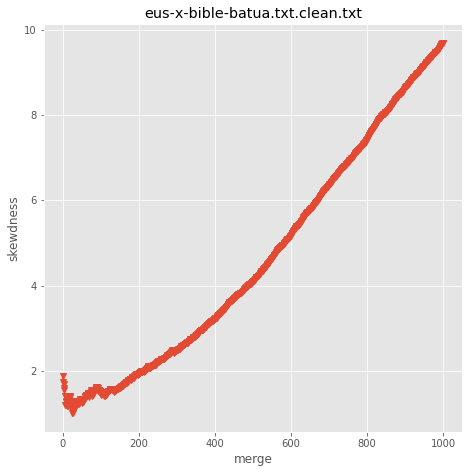

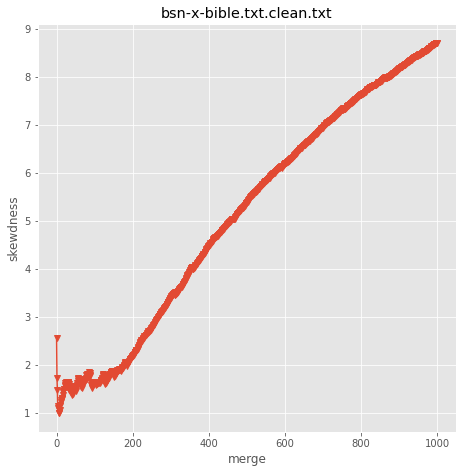

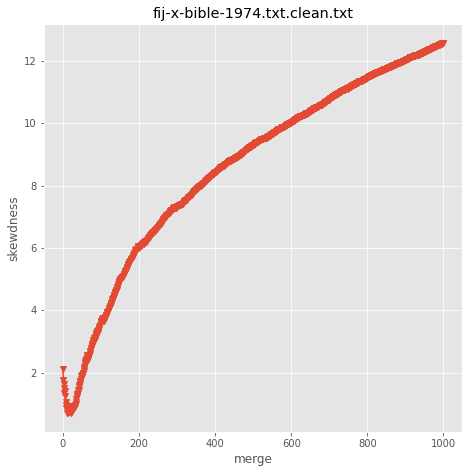

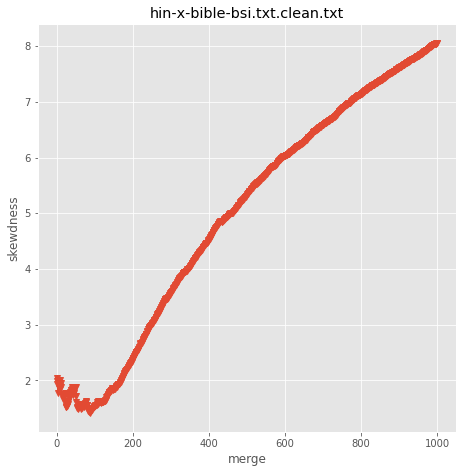

In [98]:
directory="segmented_corpusPBC_tok_0_1000_1"
all_files = os.listdir(directory) #languages
k=0
for f in all_files:
    plt.figure() #a new figure 
    skewdness=[] #for storing skewdness
    for k in range(0, 1001, 1) :
    #eng-x-bible-kingjames.txt.clean.txt.0.txt.freqs.tsv
        #print(directory+"/"+f+"/"+f+"."+str(k)+".txt.freqs.tsv")
        filepath=directory+"/"+f+"/"+f+"."+str(k)+".txt.freqs.tsv"
        freqs=pd.read_csv(filepath, sep="\t", names=["subword", "freq"])
        
        freqs['rank'] = freqs['freq'].rank(ascending=False)
        freqs['log_freq'] = np.log10(freqs['freq'])
        freqs['log_rank'] = np.log10(freqs['rank'])
    
        skewdness.append(skew(freqs['freq'], bias=False))
        
    plt.plot(list(range(0, 1001, 1)), skewdness,'-v')
    plt.xlabel('merge')
    plt.ylabel('skewdness')
        
    plt.savefig("plots/"+f+'.skew.png')
    plt.title(f)
    
    #import sys
    #sys.exit()
    